# Lets Test [Facebook Prophet](https://facebook.github.io/prophet/) to predict Cryptocurrency Prices

Prophet is a procedure for forecasting time series data. It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It works best with daily periodicity data with at least one year of historical data. Prophet is robust to missing data, shifts in the trend, and large outliers.

## Disclaimer: I Have no idea what I'm doing

Inspired by awesome [David Sheehan](https://dashee87.github.io/deep%20learning/python/predicting-cryptocurrency-prices-with-deep-learning/) blog post


#### TODO: I've read some blog posts regarding "Prediction of Cryptocurrency Prices," and all of them only used history of one particular coin, to predict its value in the future. I think there is a problem with this approach; because I've seen some strong co-relation (with my eyes!)  between changes in the price of Bitcoin and other AltCoins. More on this later! 

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [46]:
import bs4

bs4.__version__
'4.4.1'

'4.4.1'

In [48]:
import html5lib

html5lib.__version__
'0.9999999'

'0.9999999'

In [51]:
# top 15 coins - at the time of writing this!
coins = ['bitcoin', 'ethereum', 'bitcoin-cash', 'ripple', 'litecoin', 'cardano', 'iota', 'dash', 'nem', 'monero', 'bitcoin-gold', 'stellar', 'neo', 'eos', 'ethereum-classic']

In [79]:
coin_market_info = {}

for coin in coins:
    # getting data from 2017 until now!
    coin_market_info[str(coin)] = pd.read_html("https://coinmarketcap.com/currencies/{0}/historical-data/?start=20170101&end={1}".format(str(coin),time.strftime("%Y%m%d")))[0]
    coin_market_info[str(coin)] = coin_market_info[str(coin)].assign(Date=pd.to_datetime(bitcoin_market_info['Date']))

In [97]:
prophets = {}

for coin in coins:
    df = coin_market_info[str(coin)][['Date', 'Open']]
    df = df.rename(index=str, columns={"Date": "ds", "Open": "y"})
    # log-transform the prices
#     df['y'] = np.log(df['y'])
    prophets[str(coin)] = Prophet()
    prophets[str(coin)].fit(df);

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonal

## Make prediction

In [133]:
%%time

prophecies = {}

for coin in coins:
    # predict price for next 90 days
    prophecies[str(coin)] = prophets[str(coin)].make_future_dataframe(periods=120)
    prophecies[str(coin)] = prophets[str(coin)].predict(future)


CPU times: user 34.2 s, sys: 99.4 ms, total: 34.3 s
Wall time: 34.3 s


## Bitcoin

CPU times: user 185 ms, sys: 26 µs, total: 185 ms
Wall time: 183 ms


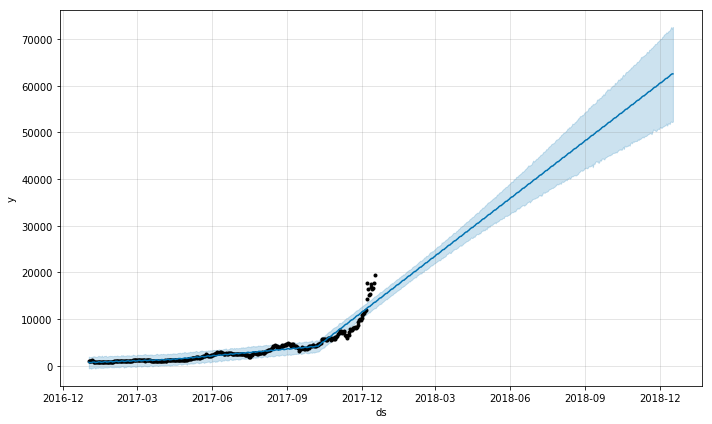

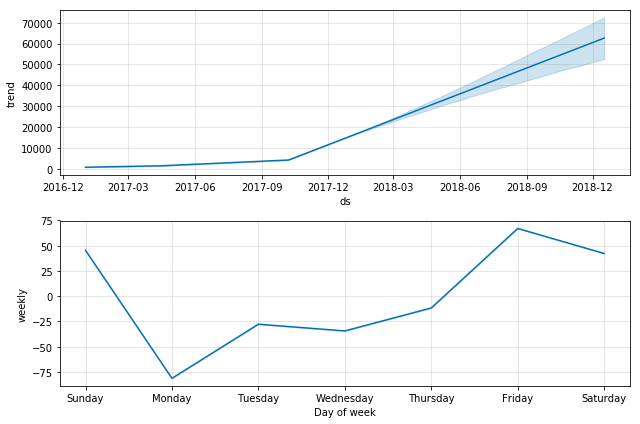

In [134]:
%%time

p = prophets['bitcoin'].plot(prophecies['bitcoin'])
pc = prophets['bitcoin'].plot_components(prophecies['bitcoin'])

## Ethereum

CPU times: user 264 ms, sys: 4.08 ms, total: 268 ms
Wall time: 265 ms


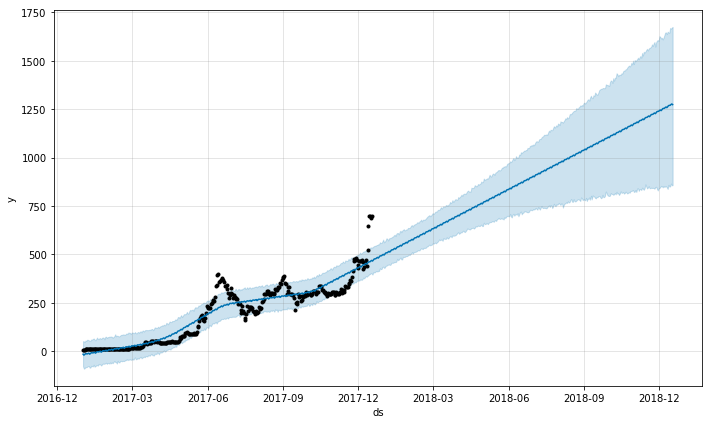

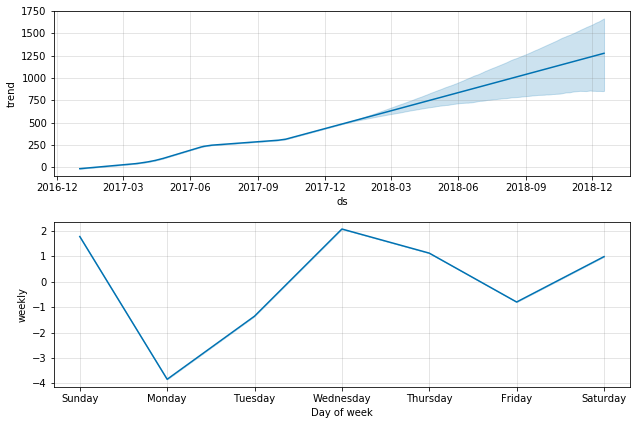

In [135]:
%%time

coin = coins[1]

p = prophets[str(coin)].plot(prophecies[str(coin)])
pc = prophets[str(coin)].plot_components(prophecies[str(coin)])

## Bitcoin Cash

CPU times: user 224 ms, sys: 4.01 ms, total: 228 ms
Wall time: 224 ms


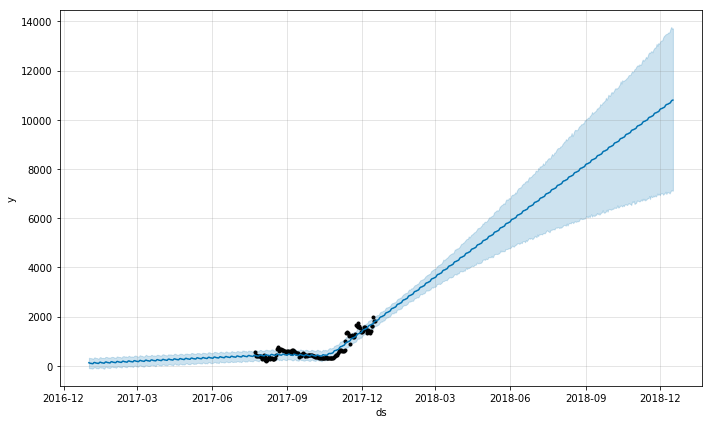

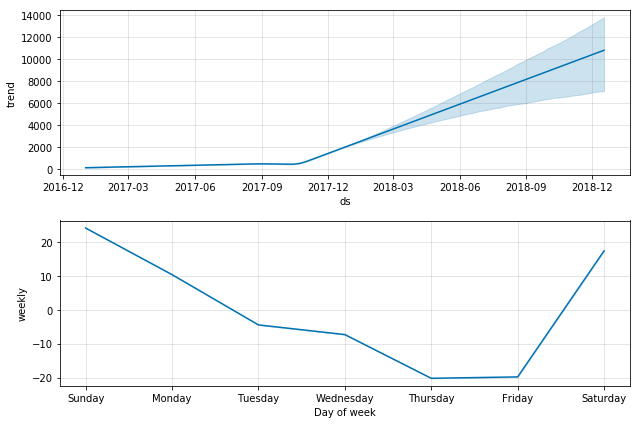

In [136]:
%%time

coin = coins[2]

p = prophets[str(coin)].plot(prophecies[str(coin)])
pc = prophets[str(coin)].plot_components(prophecies[str(coin)])

## Ripple

CPU times: user 188 ms, sys: 80 µs, total: 188 ms
Wall time: 186 ms


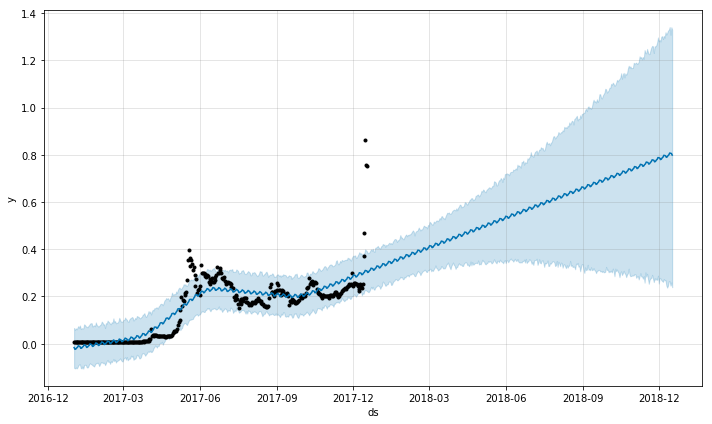

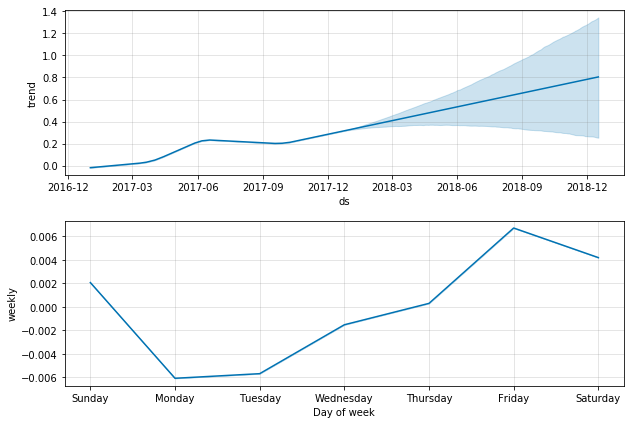

In [137]:
%%time

coin = coins[3]

p = prophets[str(coin)].plot(prophecies[str(coin)])
pc = prophets[str(coin)].plot_components(prophecies[str(coin)])

## LiteCoin

CPU times: user 173 ms, sys: 7.87 ms, total: 181 ms
Wall time: 179 ms


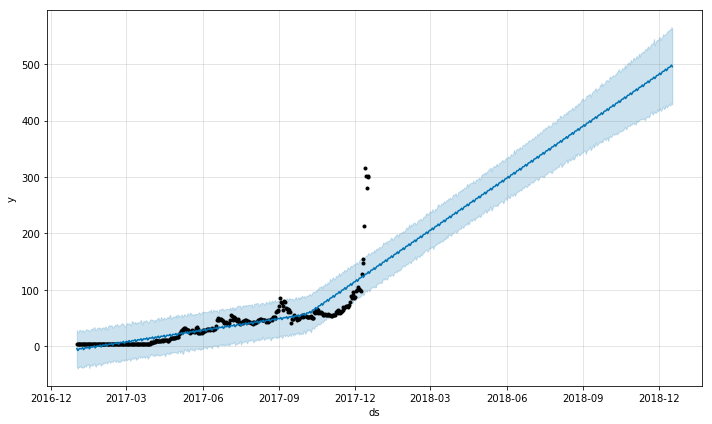

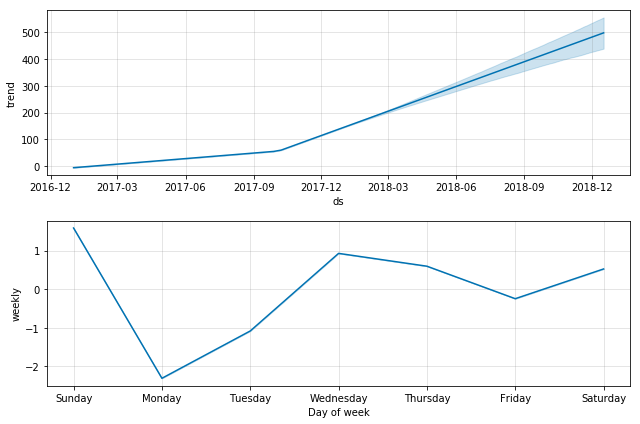

In [138]:
%%time

coin = coins[4]

p = prophets[str(coin)].plot(prophecies[str(coin)])
pc = prophets[str(coin)].plot_components(prophecies[str(coin)])

## Cardano

CPU times: user 182 ms, sys: 41 µs, total: 182 ms
Wall time: 181 ms


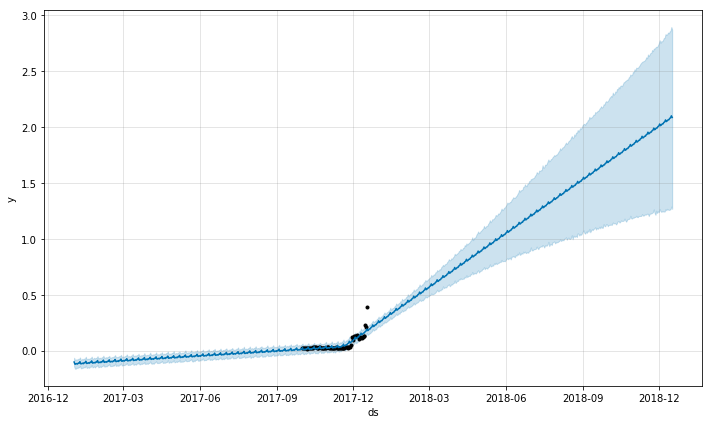

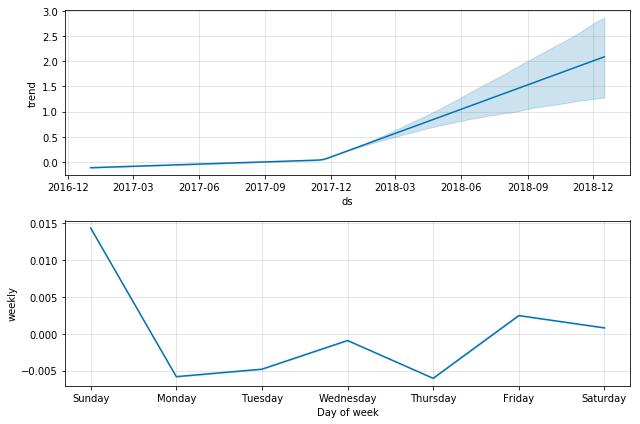

In [139]:
%%time

coin = coins[5]

p = prophets[str(coin)].plot(prophecies[str(coin)])
pc = prophets[str(coin)].plot_components(prophecies[str(coin)])